In [1]:
pip install -r requirements.txt

  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 5.4 MB/s  0:00:04m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 8.9 MB/s  0:00:006m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 9.6 MB/s  0:00:026m0:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 8.3 MB/s  0:00:00m0:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 11.8 MB/s  0:00:01m0:00:0100:01
Using cached cachetools-5.5.2-py3-none-any.whl (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 10.3 MB/s  0:00:00 eta 0:00:01
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.1.2
    Uninstalling tenacity-9.1.2:
      Successfully uninstalled tenacity-9.1.2
  Attempting uninstall: protobuf━━━━━━━━━━━━━━━━  0/16 [tenacity]
    Found existing installation: protobuf

In [2]:
!pip install --upgrade pip
!pip install --force-reinstall geopandas rasterio rioxarray rasterstats shapely pyproj matplotlib pandas numpy folium

  Using cached geopandas-1.1.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached rasterstats-0.20.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached pandas-2.3.3-cp310-cp310-macosx_10_9_x86_64.whl.metadata (91 kB)
  Using cached numpy-2.2.6-cp310-cp310-macosx_14_0_x86_64.whl.metadata (62 kB)
  Using cached folium-0.20.0-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached certifi-2025.10.5-py3-none-any.whl.metadata (2.5 kB)
  Using cached click-8.3.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached fiona-1.10.1-cp310-cp310-macosx_10_15_x86_64.whl.metadata (56 kB)
  Using cached simplejson-3.20.2-cp310-cp310-macosx_10_9_x86_64.whl.metadata (3.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)

In [3]:
import geopandas as gpd
import rioxarray
import rasterio
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium


<Axes: >

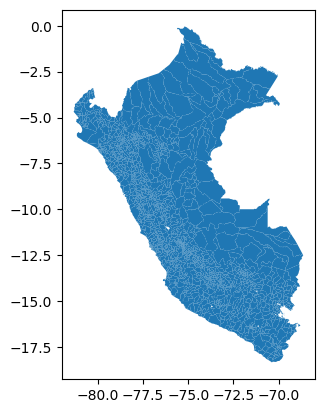

In [13]:
# Upload shape file at district level

maps = gpd.read_file(r'_data/shape_file/DISTRITOS.shp')
# Muestra las primeras 5 filas de tu tabla
maps.head()
# Dibuja un mapa básico de los distritos
maps.plot()

In [14]:
maps.crs




<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
maps.columns

Index(['IDDPTO', 'DEPARTAMEN', 'IDPROV', 'PROVINCIA', 'IDDIST', 'DISTRITO',
       'CAPITAL', 'CODCCPP', 'AREA', 'FUENTE', 'geometry'],
      dtype='object')

In [ ]:
# Asegura que todas las columnas estén en mayúsculas 
maps.columns = maps.columns.str.upper()

# Limpieza de acentos y estandarización del nombre del distrito
maps['DISTRITO'] = (
    maps['DISTRITO']
    .str.normalize('NFKD')
    .str.encode('ascii', errors='ignore')
    .str.decode('utf-8')
    .str.upper()
)

# Verifica los primeros valores
maps.head()


,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,GEOMETRY
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."


In [17]:
import geopandas as gpd
import rioxarray
from rasterstats import zonal_stats
import pandas as pd
import numpy as np


In [23]:
# Carga el raster Tmin
tmin_raster = rioxarray.open_rasterio("tmin_raster.tif")

# Si es multibanda (por ejemplo, una banda por año o mes)
print(tmin_raster)


<xarray.DataArray (band: 5, y: 397, x: 285)> Size: 2MB
[565725 values with dtype=float32]
Coordinates:
  * band         (band) int64 40B 1 2 3 4 5
  * x            (x) float64 2kB -81.35 -81.3 -81.25 ... -67.26 -67.21 -67.16
  * y            (y) float64 3kB 1.175 1.125 1.075 ... -18.53 -18.58 -18.63
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0


In [26]:
import os
os.makedirs("../data", exist_ok=True)


# 3.2 — Zonal statistics

In [28]:
import geopandas as gpd
import pandas as pd
from rasterstats import zonal_stats
import rioxarray

# Asegura que ambos CRS coincidan
if maps.crs != tmin_raster.rio.crs:
    maps = maps.to_crs(tmin_raster.rio.crs)

# --- Cálculo por banda ---
results = []

for i in range(1, len(tmin_raster.band) + 1):  # bandas 1 a 5
    print(f"Procesando banda {i}...")
    
    # Guarda temporalmente la banda i
    temp_file = f"../data/temp_band_{i}.tif"
    tmin_raster.sel(band=i).rio.to_raster(temp_file)
    
    # Calcula estadísticas para esa banda
    stats = zonal_stats(
        vectors=maps,
        raster=temp_file,
        stats=["mean", "min", "max", "std", "percentile_10", "percentile_90"],
        geojson_out=False
    )
    
    # Convierte a DataFrame y añade la etiqueta de banda
    df_band = pd.DataFrame(stats)
    df_band["banda"] = i
    df_band["DISTRITO"] = maps["DISTRITO"]
    
    results.append(df_band)

# --- Combina todo ---
zonal_df = pd.concat(results, ignore_index=True)

# Calcula un rango térmico intra-distrital (opcional)
zonal_df["range_temp"] = zonal_df["max"] - zonal_df["min"]

# Guarda los resultados
zonal_df.to_csv("../data/zonal_tmin_bandas.csv", index=False)

print("✅ Listo: estadísticas zonales por distrito y por banda calculadas.")
zonal_df.head()


Procesando banda 1...
Procesando banda 2...
Procesando banda 3...
Procesando banda 4...
Procesando banda 5...
✅ Listo: estadísticas zonales por distrito y por banda calculadas.


,min,max,mean,std,percentile_10,percentile_90,banda,DISTRITO,range_temp
0,8.903979,22.604116,18.932154,3.430219,13.836891,22.358988,1,CODO DEL POZUZO,13.700137
1,19.775057,22.860834,22.290649,0.464426,21.992695,22.676195,1,TOURNAVISTA,3.085777
2,21.953405,22.141968,22.056366,0.076649,21.955791,22.137794,1,ALEXANDER VON HUMBOLDT,0.188562
3,21.661476,22.481043,22.263211,0.158932,22.042723,22.416752,1,IRAZOLA,0.819567
4,21.975763,22.385101,22.173068,0.118299,22.023388,22.361992,1,NESHUYA,0.409338


# 3.3 — Analysis & Visualizations

In [29]:
import pandas as pd

zonal_df = pd.read_csv("../data/zonal_tmin_bandas.csv")
zonal_df.head()


,min,max,mean,std,percentile_10,percentile_90,banda,DISTRITO,range_temp
0,8.903979,22.604116,18.932154,3.430219,13.836891,22.358988,1,CODO DEL POZUZO,13.700137
1,19.775057,22.860834,22.290649,0.464426,21.992695,22.676195,1,TOURNAVISTA,3.085777
2,21.953405,22.141968,22.056366,0.076649,21.955791,22.137794,1,ALEXANDER VON HUMBOLDT,0.188562
3,21.661476,22.481043,22.263211,0.158932,22.042723,22.416752,1,IRAZOLA,0.819567
4,21.975763,22.385101,22.173068,0.118299,22.023388,22.361992,1,NESHUYA,0.409338


In [30]:
zonal_df["mean"].describe()


count    8945.000000
mean        9.453099
std         6.880738
min        -5.989168
25%         3.941030
50%         8.444639
75%        15.180823
max        23.294387
Name: mean, dtype: float64

In [32]:
zonal_mean = (
    zonal_df.groupby("DISTRITO")
    .agg({"mean": "mean", "min": "mean", "max": "mean"})
    .reset_index()
)


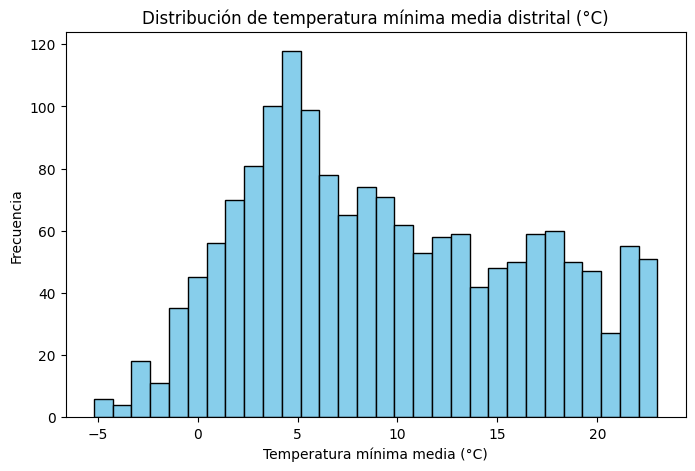

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(zonal_mean["mean"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribución de temperatura mínima media distrital (°C)")
plt.xlabel("Temperatura mínima media (°C)")
plt.ylabel("Frecuencia")
plt.show()


In [35]:
top15 = zonal_mean.nlargest(15, "mean")
bottom15 = zonal_mean.nsmallest(15, "mean")

print("Distritos más cálidos:")
display(top15[["DISTRITO", "mean"]])
print("\nDistritos más fríos:")
display(bottom15[["DISTRITO", "mean"]])


Distritos más cálidos:


,DISTRITO,mean
935,MORONA,23.008980
1670,YAGUAS,23.005028
1214,RAMON CASTILLA,22.972547
1074,PASTAZA,22.919820
1089,PEBAS,22.878973
774,LAS AMAZONAS,22.814834
666,IQUITOS,22.780908
1173,PUTUMAYO,22.779239
661,INDIANA,22.761415
1699,YAVARI,22.747571



Distritos más fríos:


,DISTRITO,mean
199,CAPAZO,-5.191071
1513,SUSAPAYA,-5.157803
1543,TARATA,-4.995736
1558,TICACO,-4.417395
1270,SAN ANTONIO DE CHUCA,-4.390306
191,CANDARAVE,-4.359307
408,CONDOROMA,-4.122947
1063,PARATIA,-4.094575
219,CARUMAS,-3.411975
1329,SAN JUAN DE TARUCANI,-3.343182


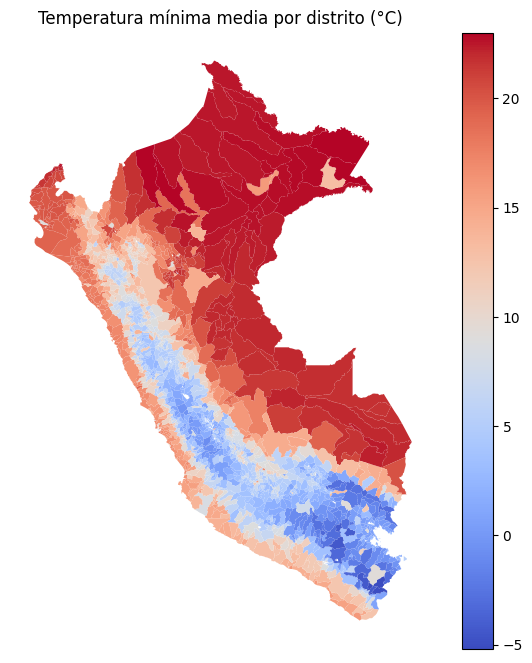

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1 Cargar el shapefile
maps = gpd.read_file("_data/shape_file/DISTRITOS.shp")

# 2️ Estandarizar nombres de columnas (por si acaso)
maps.columns = maps.columns.str.upper()

# 3️ Verificar nombre de columna geográfica y activarla
if "GEOMETRY" in maps.columns:
    maps = maps.set_geometry("GEOMETRY")

# 4️ Definir CRS si no está
if maps.crs is None:
    maps.set_crs("EPSG:4326", inplace=True)

# 5️ Hacer el merge con tus datos zonales (usa la media o el df que quieras)
map_merge = maps.merge(zonal_mean, on="DISTRITO", how="left")

# 6️ Asegurar que conserve geometría y CRS después del merge
map_merge = gpd.GeoDataFrame(map_merge, geometry="GEOMETRY", crs=maps.crs)

# 7️ Graficar
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
map_merge.plot(column="mean", cmap="coolwarm", legend=True, ax=ax)
plt.title("Temperatura mínima media por distrito (°C)")
plt.axis("off")
plt.show()
